#  Working with Raster Data - Satellite Images

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
Some remote sensing datasets are stored with each band in a separate file. However, often you want to use all of the bands together in your analysis. For example you need all of the bands together in the same file or “stack” in order to plot a color RGB image. EarthPy has a stack() function that allows you to take a set of .tif files that are all in the same spatial extent, CRS and resolution and either export them together a single stacked .tif file or work with them in Python directly as a stacked numpy array.<br><br>

To begin using the EarthPy stack() function, import the needed packages and create an array to be plotted. Below you plot the data as continuous with a colorbar using the plot_bands() function.

We will use es.stack() function of earthpy library to create a raster stack of multi-band raster. It need three steps:

<li>Create a raster list using glob() function</li>
<li>Create a path and define a name for mutli-band raster</li>
    <li>Apply es.stack() to creat new stacked raster with all bands save as multi tif</li>
    <li>Then apply rio.open to read the raster bands</li>
</div>

**Open individual bands one by one of landsat 5**

In [2]:
# Import necessary library
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline 


import warnings
warnings.filterwarnings("ignore")

In [8]:
# Optical bands of landsat 5
b1="L5_data/LT05_L1TP_144052_20110203_20200823_02_T1_B1.TIF"
b2="L5_data/LT05_L1TP_144052_20110203_20200823_02_T1_B2.TIF"
b3="L5_data/LT05_L1TP_144052_20110203_20200823_02_T1_B3.TIF"
b4="L5_data/LT05_L1TP_144052_20110203_20200823_02_T1_B4.TIF"
b5="L5_data/LT05_L1TP_144052_20110203_20200823_02_T1_B5.TIF"
b7="L5_data/LT05_L1TP_144052_20110203_20200823_02_T1_B7.TIF"

# Thermal band of landsat 5
b6="L5_data/LT05_L1TP_144052_20110203_20200823_02_T1_B6.TIF"

In [9]:
l5b1 = rio.open(b1)
l5b2 = rio.open(b2)
l5b3 = rio.open(b3)
l5b4 = rio.open(b4)
l5b5 = rio.open(b5)
l5b6 = rio.open(b6)
l5b7 = rio.open(b7)

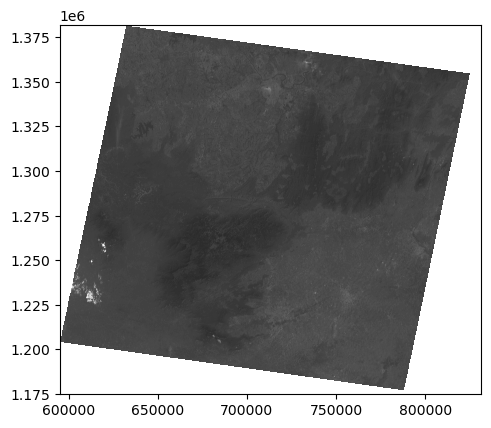

<Axes: >

In [5]:
show(l5b1, cmap="gist_gray")

[Text(550000.0, 0, '550000'),
 Text(600000.0, 0, '600000'),
 Text(650000.0, 0, '650000'),
 Text(700000.0, 0, '700000'),
 Text(750000.0, 0, '750000'),
 Text(800000.0, 0, '800000'),
 Text(850000.0, 0, '850000')]

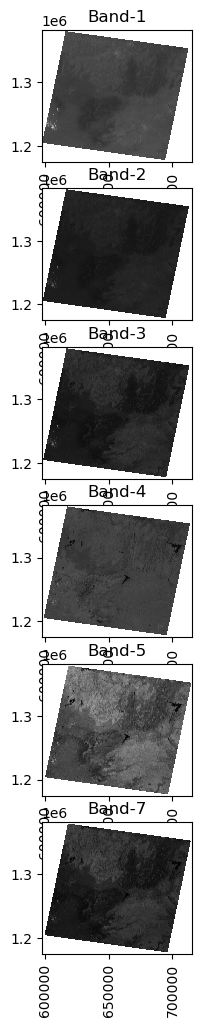

In [13]:
# Plot all bands
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=1, nrows=6, figsize=(12, 12), sharey=True)

# Plot optical bands
show(l5b1,cmap="gist_gray", ax=ax1)
show(l5b2,cmap="gist_gray", ax=ax2)
show(l5b3,cmap="gist_gray", ax=ax3)
show(l5b4,cmap="gist_gray", ax=ax4)
show(l5b5,cmap="gist_gray", ax=ax5)
show(l5b7,cmap="gist_gray", ax=ax6)

# Add titles
ax1.set_title("Band-1")
ax2.set_title("Band-2")
ax3.set_title("Band-3")
ax4.set_title("Band-4")
ax5.set_title("Band-5")
ax6.set_title("Band-7")

# Collect X-label
label1 = ax1.get_xticklabels()
label2 = ax2.get_xticklabels()
label3 = ax3.get_xticklabels()
label4 = ax4.get_xticklabels()
label5 = ax5.get_xticklabels()
label6 = ax6.get_xticklabels()

# Rotate the label
ax1.set_xticklabels(label1, rotation=90)
ax2.set_xticklabels(label2, rotation=90)
ax3.set_xticklabels(label3, rotation=90)
ax4.set_xticklabels(label4, rotation=90)
ax5.set_xticklabels(label5, rotation=90)
ax6.set_xticklabels(label6, rotation=90)

In [6]:
# Subset all the bands
import geopandas as gpd
import os

In [7]:
print(os.getcwd())
# Draw your aoi from geojson.io and read it
fp = "zip://L5_data/aoi.zip!layers"
gdf = gpd.read_file(fp)

C:\Users\wwwsu\Pratical_Class


<Axes: >

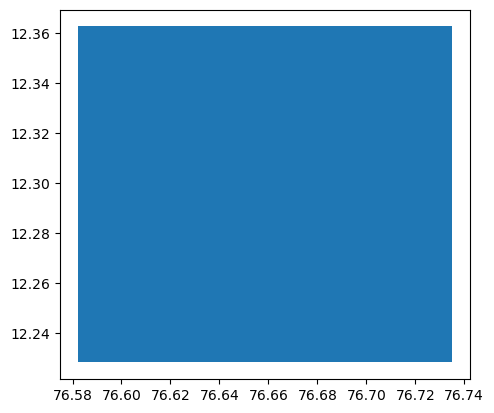

In [8]:
gdf.plot()

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
gdf_pcs = gdf.to_crs("EPSG:32643")

<Axes: >

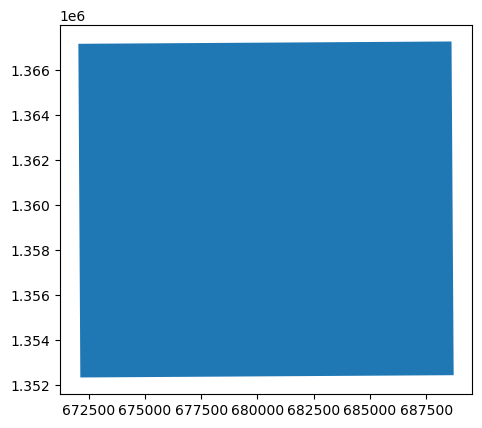

In [11]:
gdf_pcs.plot()

In [12]:
gdf_pcs.to_file("L5_data/aoi_mysore.shp")

<Axes: >

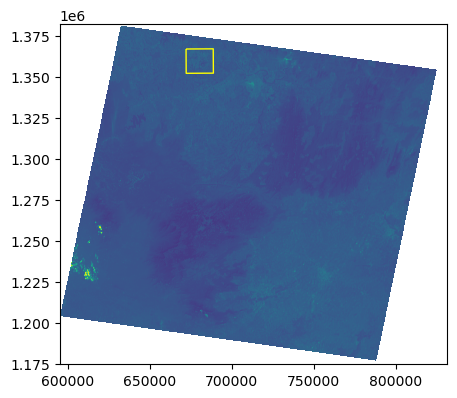

In [13]:
# Plotting both Band and AOI
fig, ax1 = plt.subplots(figsize=(5, 15))
rio.plot.show(l5b1, ax=ax1)
gdf_pcs.plot(ax=ax1, facecolor='none', edgecolor='yellow')

In [14]:
# Extracting Coordinates from Shapefile by converting into JSON
def collectCoordinates(gdf):
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [15]:
aoi_coor = collectCoordinates(gdf_pcs)

In [16]:
aoi_coor

[{'type': 'Polygon',
  'coordinates': [[[672040.1603853151, 1367146.582772707],
    [672127.404648334, 1352315.955066773],
    [688720.5641074473, 1352417.7249188123],
    [688624.8999549719, 1367249.3989317357],
    [672040.1603853151, 1367146.582772707]]]}]

In [ ]:
from rasterio.mask import mask
inputBand = l5b7
out_tif = 'L5_data/Subsetted/B7.tif'
out_img, out_transform = mask(dataset=inputBand, shapes=aoi_coor, crop=True)
out_meta = inputBand.meta.copy()

new_crs={'init': 'epsg:32643'}
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": new_crs}
                         )

with rio.open(out_tif, "w", **out_meta) as dest:
    dest.write(out_img)

band=rio.open(out_tif)
show(band, cmap='gray')

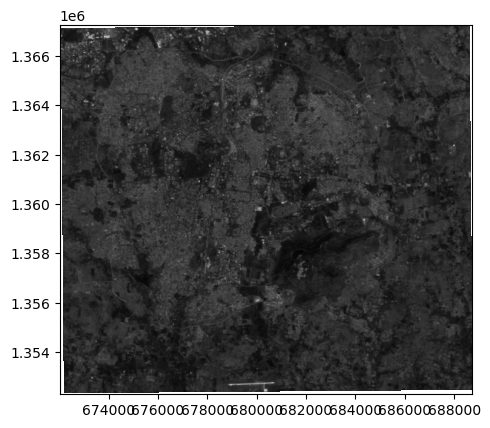

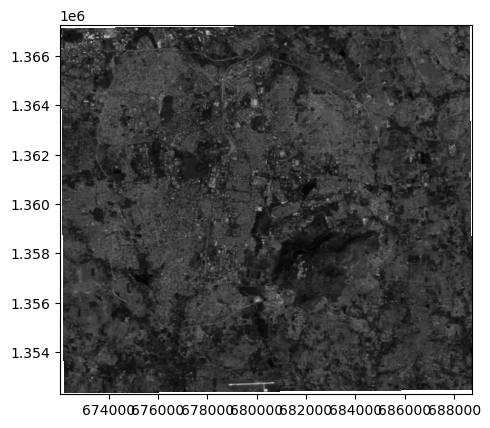

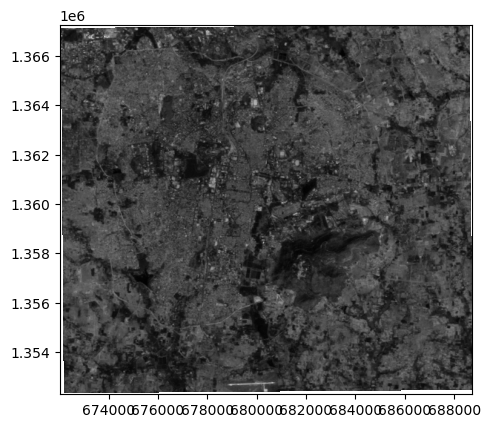

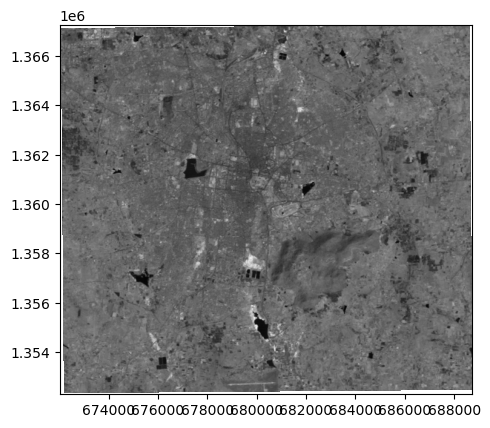

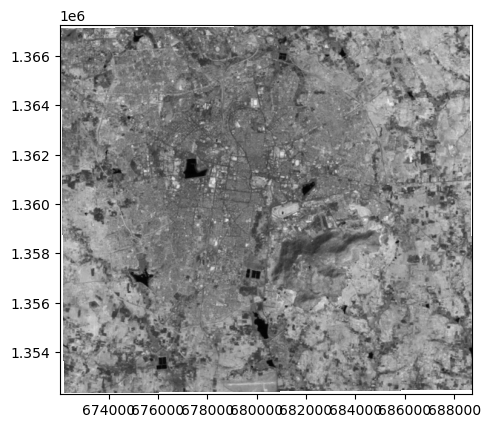

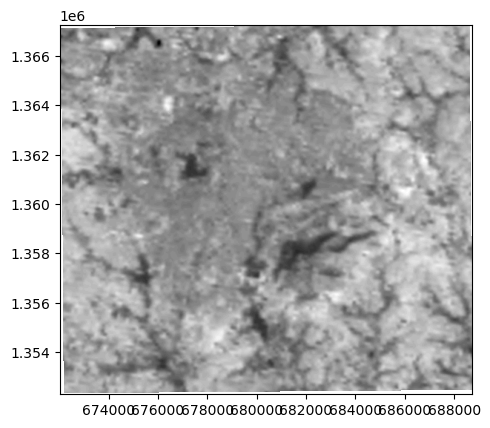

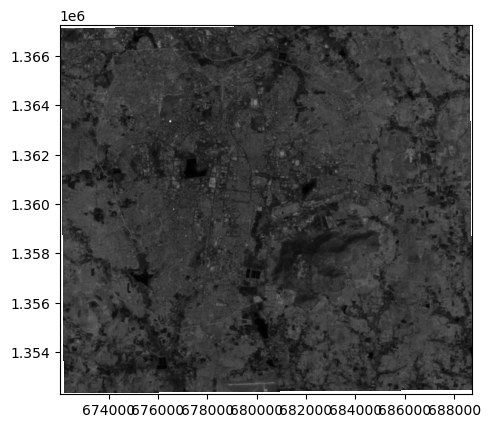

In [19]:
# Automating 
from rasterio.mask import mask
import os
try:
    os.mkdir("L5_data/subsett")
    newFolder = 'subsett'
except:
    newFolder = 'subsett'

bands = [l5b1,l5b2,l5b3,l5b4,l5b5,l5b6,l5b7]
bandno = [i for i in range(1,8)]
for i,j in zip(bands,bandno):
        inputBand = i
        out_tif = 'L5_data/' + f'{newFolder}' + f'/{j}.tif'
        out_img, out_transform = mask(dataset=inputBand, shapes=aoi_coor, crop=True)
        out_meta = inputBand.meta.copy()
        
        new_crs={'init': 'epsg:32643'}
        out_meta.update({"driver": "GTiff",
                         "height": out_img.shape[1],
                         "width": out_img.shape[2],
                         "transform": out_transform,
                         "crs": new_crs}
                                 )
        
        with rio.open(out_tif, "w", **out_meta) as dest:
            dest.write(out_img)
                
        band=rio.open(out_tif)
        show(band, cmap='gray')
